<a href="https://colab.research.google.com/github/GiliardGodoi/bioinfo-sars-cov2-datasets/blob/main/EstudoCaso_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória das Características Extraídas

Os dados podem ser obtidos diretamente de:
https://github.com/GiliardGodoi/bioinfo-sars-cov2-datasets

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

import os
from os import path

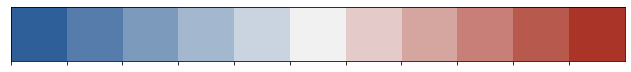

In [2]:
color_map = sns.diverging_palette(250, 15, s=80, l=40, n=11, center="light", as_cmap=True)
sns.palplot(sns.diverging_palette(250, 15, s=80, l=40, n=11, center="light",))

In [3]:
base = "/content/drive/Shared drives/PPGI_GILIARD/FeatureExtraction_SARS-CoV-2"
features = "/content/drive/Shared drives/PPGI_GILIARD/FeatureExtraction_SARS-CoV-2/data/processed"
# results = "/content/drive/Shared drives/PPGI_GILIARD/FeatureExtraction_SARS-CoV-2/data/results"

In [5]:
# Diretórios com as características extraídas.

folders = os.listdir(features)

print(folders,'\n')

folder = folders[1]

print(folder,'\n')

os.listdir(path.join(features, folder))

['1-covid', '2-other-viruses'] 

2-other-viruses 



['chaos-game-theory_r4.csv',
 'complex-network_k3t10.csv',
 'fourier-class_r5.csv',
 'shannon-entropy_k12.csv']

## Carregando os *datasets*

In [8]:
df_complexNet = pd.read_csv(path.join(features, folder,'complex-network_k3t10.csv'))
df_complexNet.name = 'Complex Network Features'
print('Redes Complexas: ', df_complexNet.shape)

df_fourier = pd.read_csv(path.join(features, folder,'fourier-class_r5.csv'))
df_fourier.name = "Fourier Features"
print('Transformada Fourier', df_fourier.shape)

df_entropy = pd.read_csv(path.join(features, folder, 'shannon-entropy_k12.csv'))
df_entropy.name = "Shannon's Entropy Features"
print('Entropia (Shannon)', df_entropy.shape)

df_chaosGame = pd.read_csv(path.join(features, folder, 'chaos-game-theory_r4.csv'))
df_chaosGame.name = "Chaos Game Theory Features"
print('Teoria do Caos \ Teoria dos Jogos', df_chaosGame.shape)

Redes Complexas:  (21034, 122)
Transformada Fourier (21034, 21)
Entropia (Shannon) (21034, 14)
Teoria do Caos \ Teoria dos Jogos (21034, 21)


## Validações iniciais

Todos os *datasets* possuem o mesmo número de casos em cada classe?

In [9]:
df_complexNet[['nameseq', 'label']].groupby('label').count()

,nameseq
label,
0,19720
1,1314


In [10]:
df_fourier[['nameseq', 'label']].groupby('label').count()

,nameseq
label,
0,19720
1,1314


In [11]:
df_entropy[['nameseq', 'class']].groupby('class').count()

,nameseq
class,
0,19720
1,1314


In [12]:
df_chaosGame[['nameseq', 'label']].groupby('label').count()

,nameseq
label,
0,19720
1,1314


Existem valores que podem ser considerados como *Null* nou *NaN* nos *datasets* considerados?

In [13]:
# any(df_complexNet.isna())
# df_complexNet.isna().apply(any)

for df in [df_complexNet, df_chaosGame, df_entropy, df_fourier]:
  if any(df.isna().apply(any)) or any(df.isnull().apply(any)):
    print("There is something wrong with ", df.name)
  else:
    print("Everthing ok with  ", df.name)

Everthing ok with   Complex Network Features
Everthing ok with   Chaos Game Theory Features
Everthing ok with   Shannon's Entropy Features
Everthing ok with   Fourier Features


In [ ]:
# df_complexNet.info(verbose=True)

In [14]:
df_chaosGame.describe()

,average,median,maximum,minimum,peak,none_levated_peak,sample_standard_deviation,population_standard_deviation,percentile15,percentile25,percentile50,percentile75,amplitude,variance,interquartile_range,semi_interquartile_range,coefficient_of_variation,skewness,kurtosis,label
count,21034.000000,21034.000000,21034.000000,2.103400e+04,2.103400e+04,2.103400e+04,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000
mean,0.000768,0.000097,5.695017,3.639096e-08,4.810098e+06,2.881785e+05,0.051752,0.051755,0.000021,0.000038,0.000097,0.000224,5.695017,0.004083,0.000186,0.000093,68.699006,0.041905,0.206632,0.062470
std,0.001965,0.000055,5.488138,5.275379e-08,3.415346e+06,1.990082e+05,0.037482,0.037482,0.000011,0.000020,0.000055,0.000153,5.488138,0.088253,0.000134,0.000067,21.818958,0.015341,0.022830,0.242013
min,0.000370,0.000041,1.329790,0.000000e+00,9.406935e+03,1.836303e+04,0.025814,0.025817,0.000009,0.000016,0.000041,0.000091,1.329790,0.000667,0.000073,0.000036,9.008375,0.018452,0.064748,0.000000
25%,0.000589,0.000066,2.376828,7.288099e-09,1.810261e+06,1.259758e+05,0.030826,0.030831,0.000015,0.000026,0.000066,0.000143,2.376828,0.000951,0.000116,0.000058,48.231404,0.035181,0.188095,0.000000
50%,0.000679,0.000088,3.955278,1.928810e-08,4.424559e+06,2.674012e+05,0.044183,0.044188,0.000019,0.000035,0.000088,0.000201,3.955278,0.001953,0.000167,0.000083,67.458612,0.038630,0.206840,0.000000
75%,0.000858,0.000118,5.518269,4.432216e-08,5.487874e+06,3.073568e+05,0.055019,0.055021,0.000025,0.000046,0.000118,0.000277,5.518269,0.003027,0.000231,0.000116,73.658708,0.056110,0.225880,0.000000
max,0.273096,0.002707,98.544327,9.624939e-07,2.381329e+07,1.252081e+06,3.574442,3.574674,0.000529,0.000976,0.002707,0.008136,98.544327,12.778294,0.007160,0.003580,142.118793,0.325503,0.264913,1.000000


In [15]:
df_fourier.describe()

,average,median,maximum,minimum,peak,none_levated_peak,sample_standard_deviation,population_standard_deviation,percentile15,percentile25,percentile50,percentile75,amplitude,variance,interquartile_range,semi_interquartile_range,coefficient_of_variation,skewness,kurtosis,label
count,21034.000000,21034.000000,2.103400e+04,2.103400e+04,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,2.103400e+04,2.103400e+04,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000
mean,151.521158,3.052388,2.356100e+06,8.725935e-04,22.671258,1618.270084,17723.237071,17723.918770,0.713017,1.262797,3.052388,6.125840,2.356100e+06,7.511902e+08,4.863043,2.431522,92.603139,0.035823,0.248797,0.062470
std,114.179719,2.171730,3.791156e+06,8.785267e-04,0.513449,650.389317,20906.072369,20906.306061,0.509819,0.900775,2.171730,4.360210,3.791156e+06,1.752352e+09,3.460206,1.730103,33.055347,0.012513,0.005956,0.242013
min,27.772612,0.414165,5.383082e+04,2.135820e-07,21.527664,639.428284,1197.399062,1197.695558,0.089557,0.176759,0.414165,0.871470,5.383082e+04,1.434475e+06,0.694012,0.347006,43.114384,0.016003,0.217012,0.000000
25%,65.800790,1.249195,2.869193e+05,2.507926e-04,22.289312,1052.661149,4251.672988,4252.139973,0.297998,0.515690,1.249195,2.551904,2.869193e+05,1.808069e+07,2.057237,1.028618,65.071576,0.029274,0.245143,0.000000
50%,129.751718,2.749040,1.131017e+06,6.040896e-04,22.630667,1565.208457,11918.635568,11919.297438,0.633495,1.129461,2.749040,5.564157,1.131017e+06,1.420697e+08,4.412653,2.206327,91.851925,0.031957,0.248800,0.000000
75%,153.753553,3.533875,1.593928e+06,1.202749e-03,23.143017,1696.292152,15389.744725,15390.462379,0.836196,1.473812,3.533875,7.074268,1.593928e+06,2.368663e+08,5.620329,2.810164,100.095568,0.045307,0.252561,0.000000
max,515.410178,12.729120,1.788351e+07,9.052204e-03,24.244508,3191.607618,94245.093903,94246.402672,3.044865,5.390870,12.729120,25.666080,1.788351e+07,8.882384e+09,20.397389,10.198695,182.854546,0.067603,0.280137,1.000000


In [16]:
df_entropy.describe()

,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,class
count,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000
mean,1.968565,3.905410,5.829725,7.732336,9.559384,11.125677,12.171310,12.687318,12.883771,12.946766,12.965277,12.970828,0.062470
std,0.028191,0.057434,0.086769,0.115364,0.154767,0.305504,0.594161,0.831815,0.947910,0.989569,1.002896,1.006858,0.242013
min,1.859170,3.705259,5.520266,7.304219,8.883945,10.048822,10.402959,10.519218,10.563043,10.581158,10.595845,10.608313,0.000000
25%,1.956828,3.875470,5.779477,7.646667,9.451601,10.829588,11.636134,11.942773,12.064443,12.101592,12.113004,12.116893,0.000000
50%,1.976368,3.915008,5.837935,7.747098,9.571163,11.159920,12.313053,12.793989,13.021219,13.095858,13.118672,13.125921,0.000000
75%,1.991398,3.953634,5.897634,7.808336,9.623742,11.336993,12.489694,13.086070,13.296282,13.362900,13.381231,13.386392,0.000000
max,1.999866,3.989023,5.972879,7.947775,9.907994,11.813612,13.485921,14.514112,14.931038,15.066718,15.114118,15.129306,1.000000


In [ ]:
# sns.pairplot(df_complexNet, hue="label", height=2.5)

In [ ]:
# sns.pairplot(df_chaosGame.iloc[:,1:], hue="label", height=2.5)

In [ ]:
#sns.pairplot(df_fourier, hue="label", height=2.5)

## Análises das Características

### Transformada de Fourier

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1.0))

In [18]:
# dimensões
df_fourier.shape

(21034, 21)

In [19]:
# colunas
df_fourier.columns

Index(['nameseq', 'average', 'median', 'maximum', 'minimum', 'peak',
       'none_levated_peak', 'sample_standard_deviation',
       'population_standard_deviation', 'percentile15', 'percentile25',
       'percentile50', 'percentile75', 'amplitude', 'variance',
       'interquartile_range', 'semi_interquartile_range',
       'coefficient_of_variation', 'skewness', 'kurtosis', 'label'],
      dtype='object')

In [20]:
col = ['average', 'median', 'maximum', 'minimum', 'peak',
       'none_levated_peak', 'sample_standard_deviation',
       'population_standard_deviation', 'percentile15', 'percentile25',
       'percentile50', 'percentile75', 'amplitude', 'variance',
       'interquartile_range', 'semi_interquartile_range',
       'coefficient_of_variation', 'skewness', 'kurtosis' ]

X = scaler.fit_transform(df_fourier[col])

df = pd.DataFrame(X, columns=col)

df['label'] = df_fourier['label']

df.head()

,average,median,maximum,minimum,peak,none_levated_peak,sample_standard_deviation,population_standard_deviation,percentile15,percentile25,percentile50,percentile75,amplitude,variance,interquartile_range,semi_interquartile_range,coefficient_of_variation,skewness,kurtosis,label
0,0.169036,0.154833,0.042026,0.050111,0.454138,0.309479,0.086626,0.086629,0.158237,0.146834,0.154833,0.159411,0.042026,0.009490,0.161781,0.161781,0.292643,0.367355,0.687816,0
1,0.171138,0.173211,0.043338,0.013418,0.562227,0.298815,0.088401,0.088404,0.169909,0.167760,0.173211,0.177378,0.043338,0.009838,0.178853,0.178853,0.297727,0.360411,0.628362,0
2,0.161452,0.169954,0.039744,0.138460,0.622920,0.282335,0.082259,0.082262,0.170382,0.165595,0.169954,0.170140,0.039744,0.008662,0.170317,0.170317,0.286213,0.372945,0.470439,0
3,0.173508,0.173287,0.044116,0.064204,0.519730,0.304334,0.089826,0.089829,0.175709,0.167177,0.173287,0.169635,0.044116,0.010121,0.169263,0.169263,0.299937,0.358130,0.567729,0
4,0.167619,0.170865,0.041811,0.146401,0.536117,0.294907,0.085981,0.085983,0.186639,0.170780,0.170865,0.165763,0.041811,0.009365,0.163437,0.163437,0.292509,0.366167,0.579601,0


In [21]:
df.describe()

,average,median,maximum,minimum,peak,none_levated_peak,sample_standard_deviation,population_standard_deviation,percentile15,percentile25,percentile50,percentile75,amplitude,variance,interquartile_range,semi_interquartile_range,coefficient_of_variation,skewness,kurtosis,label
count,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000,21034.000000
mean,0.253772,0.214229,0.129126,0.096374,0.420927,0.383532,0.177606,0.177608,0.210963,0.208288,0.214229,0.211916,0.129126,0.084423,0.211590,0.211590,0.354148,0.384108,0.503521,0.062470
std,0.234149,0.176349,0.212632,0.097053,0.188987,0.254837,0.224681,0.224681,0.172510,0.172757,0.176349,0.175853,0.212632,0.197316,0.175615,0.175615,0.236549,0.242514,0.094347,0.242013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.077985,0.067806,0.013073,0.027682,0.280343,0.161914,0.032825,0.032826,0.070531,0.065003,0.067806,0.067774,0.013073,0.001874,0.069187,0.069187,0.157129,0.257180,0.445629,0.000000
50%,0.209129,0.189597,0.060415,0.066712,0.405987,0.362741,0.115223,0.115226,0.184055,0.182716,0.189597,0.189262,0.060415,0.015836,0.188731,0.188731,0.348773,0.309179,0.503570,0.000000
75%,0.258350,0.253327,0.086378,0.132848,0.594570,0.414103,0.152528,0.152531,0.252644,0.248758,0.253327,0.250167,0.086378,0.026510,0.250024,0.250024,0.407765,0.567908,0.563151,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


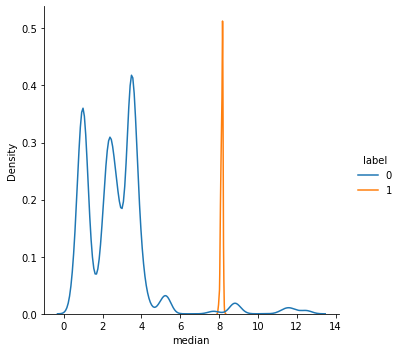

In [22]:
sns.displot(data=df_fourier, x="median", hue="label", kind="kde")

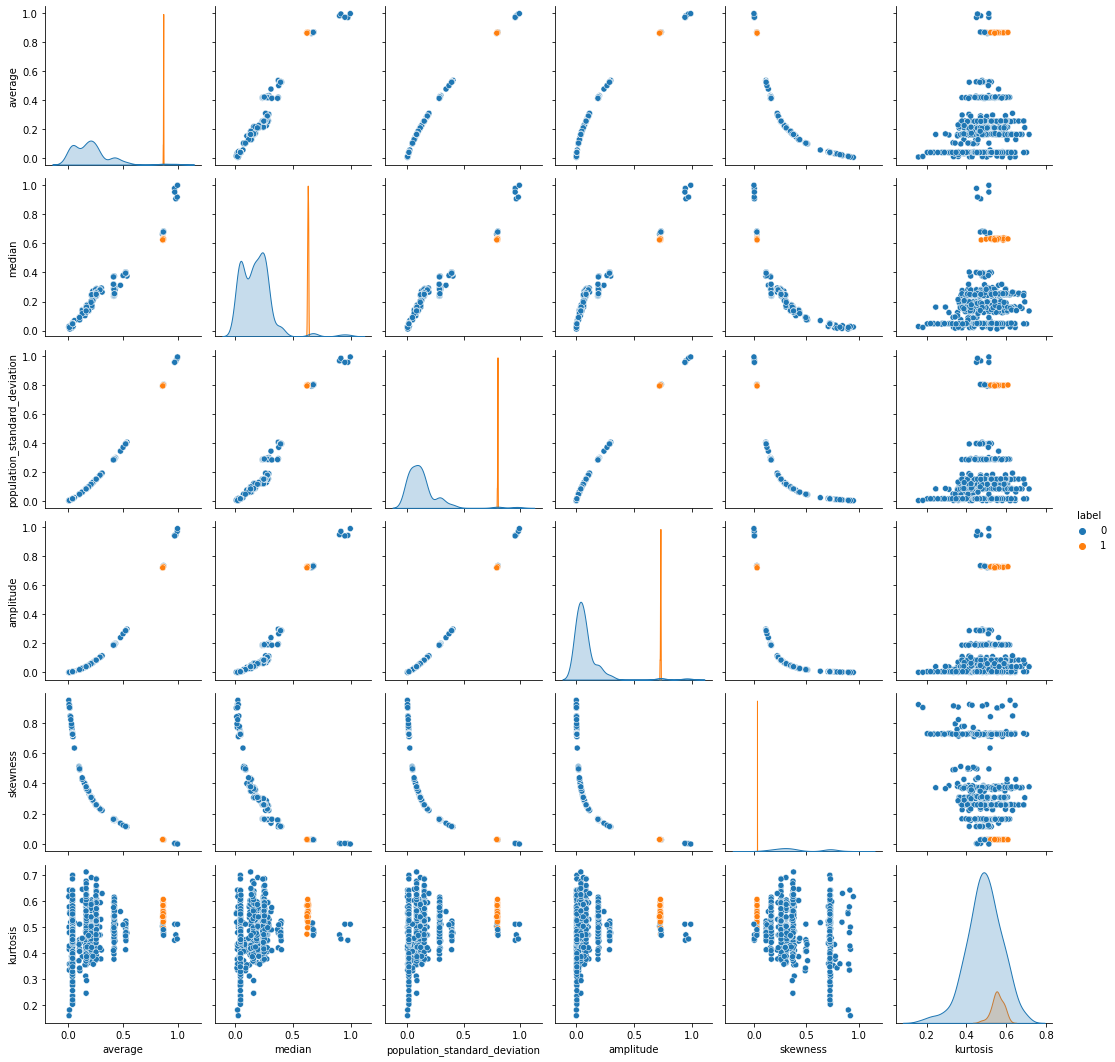

In [23]:
col = ['average', 'median', 'population_standard_deviation', 'amplitude', 'skewness', 'kurtosis', 'label']

sns.pairplot(df[col].sample(500), hue='label')

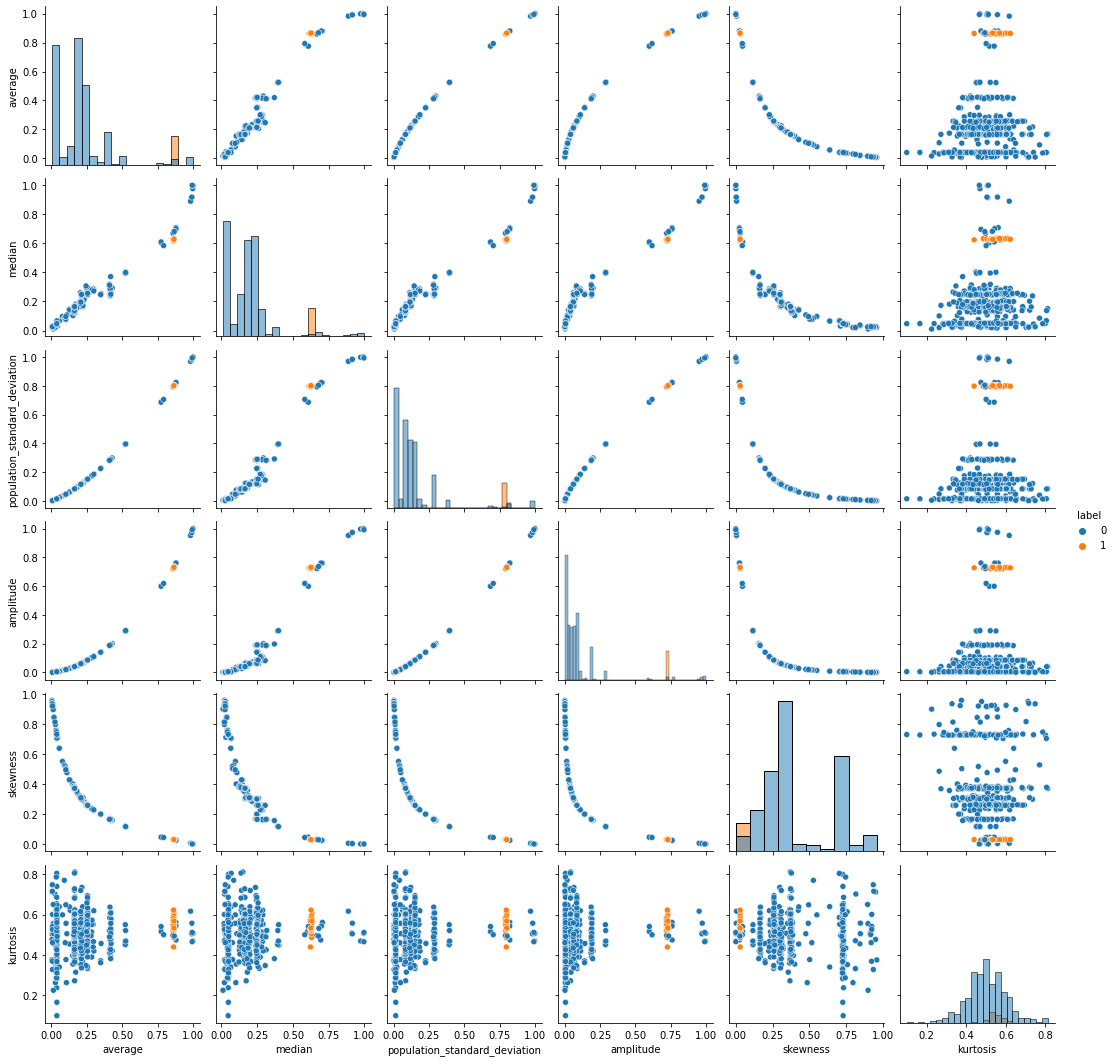

In [24]:
sns.pairplot(df[col].sample(500), hue='label', diag_kind="hist")

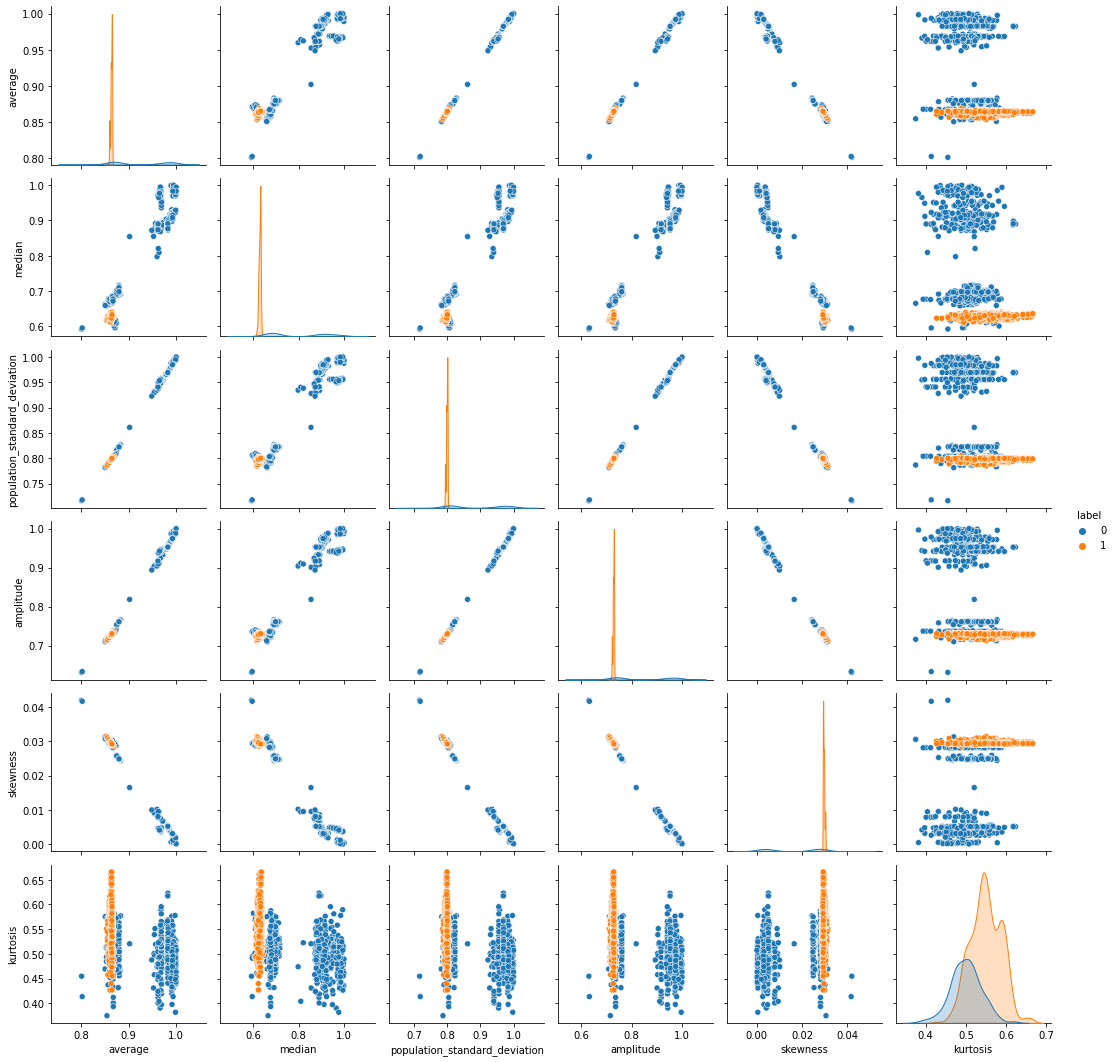

In [25]:
sns.pairplot(df[df['average'] > 0.8][col], hue='label')

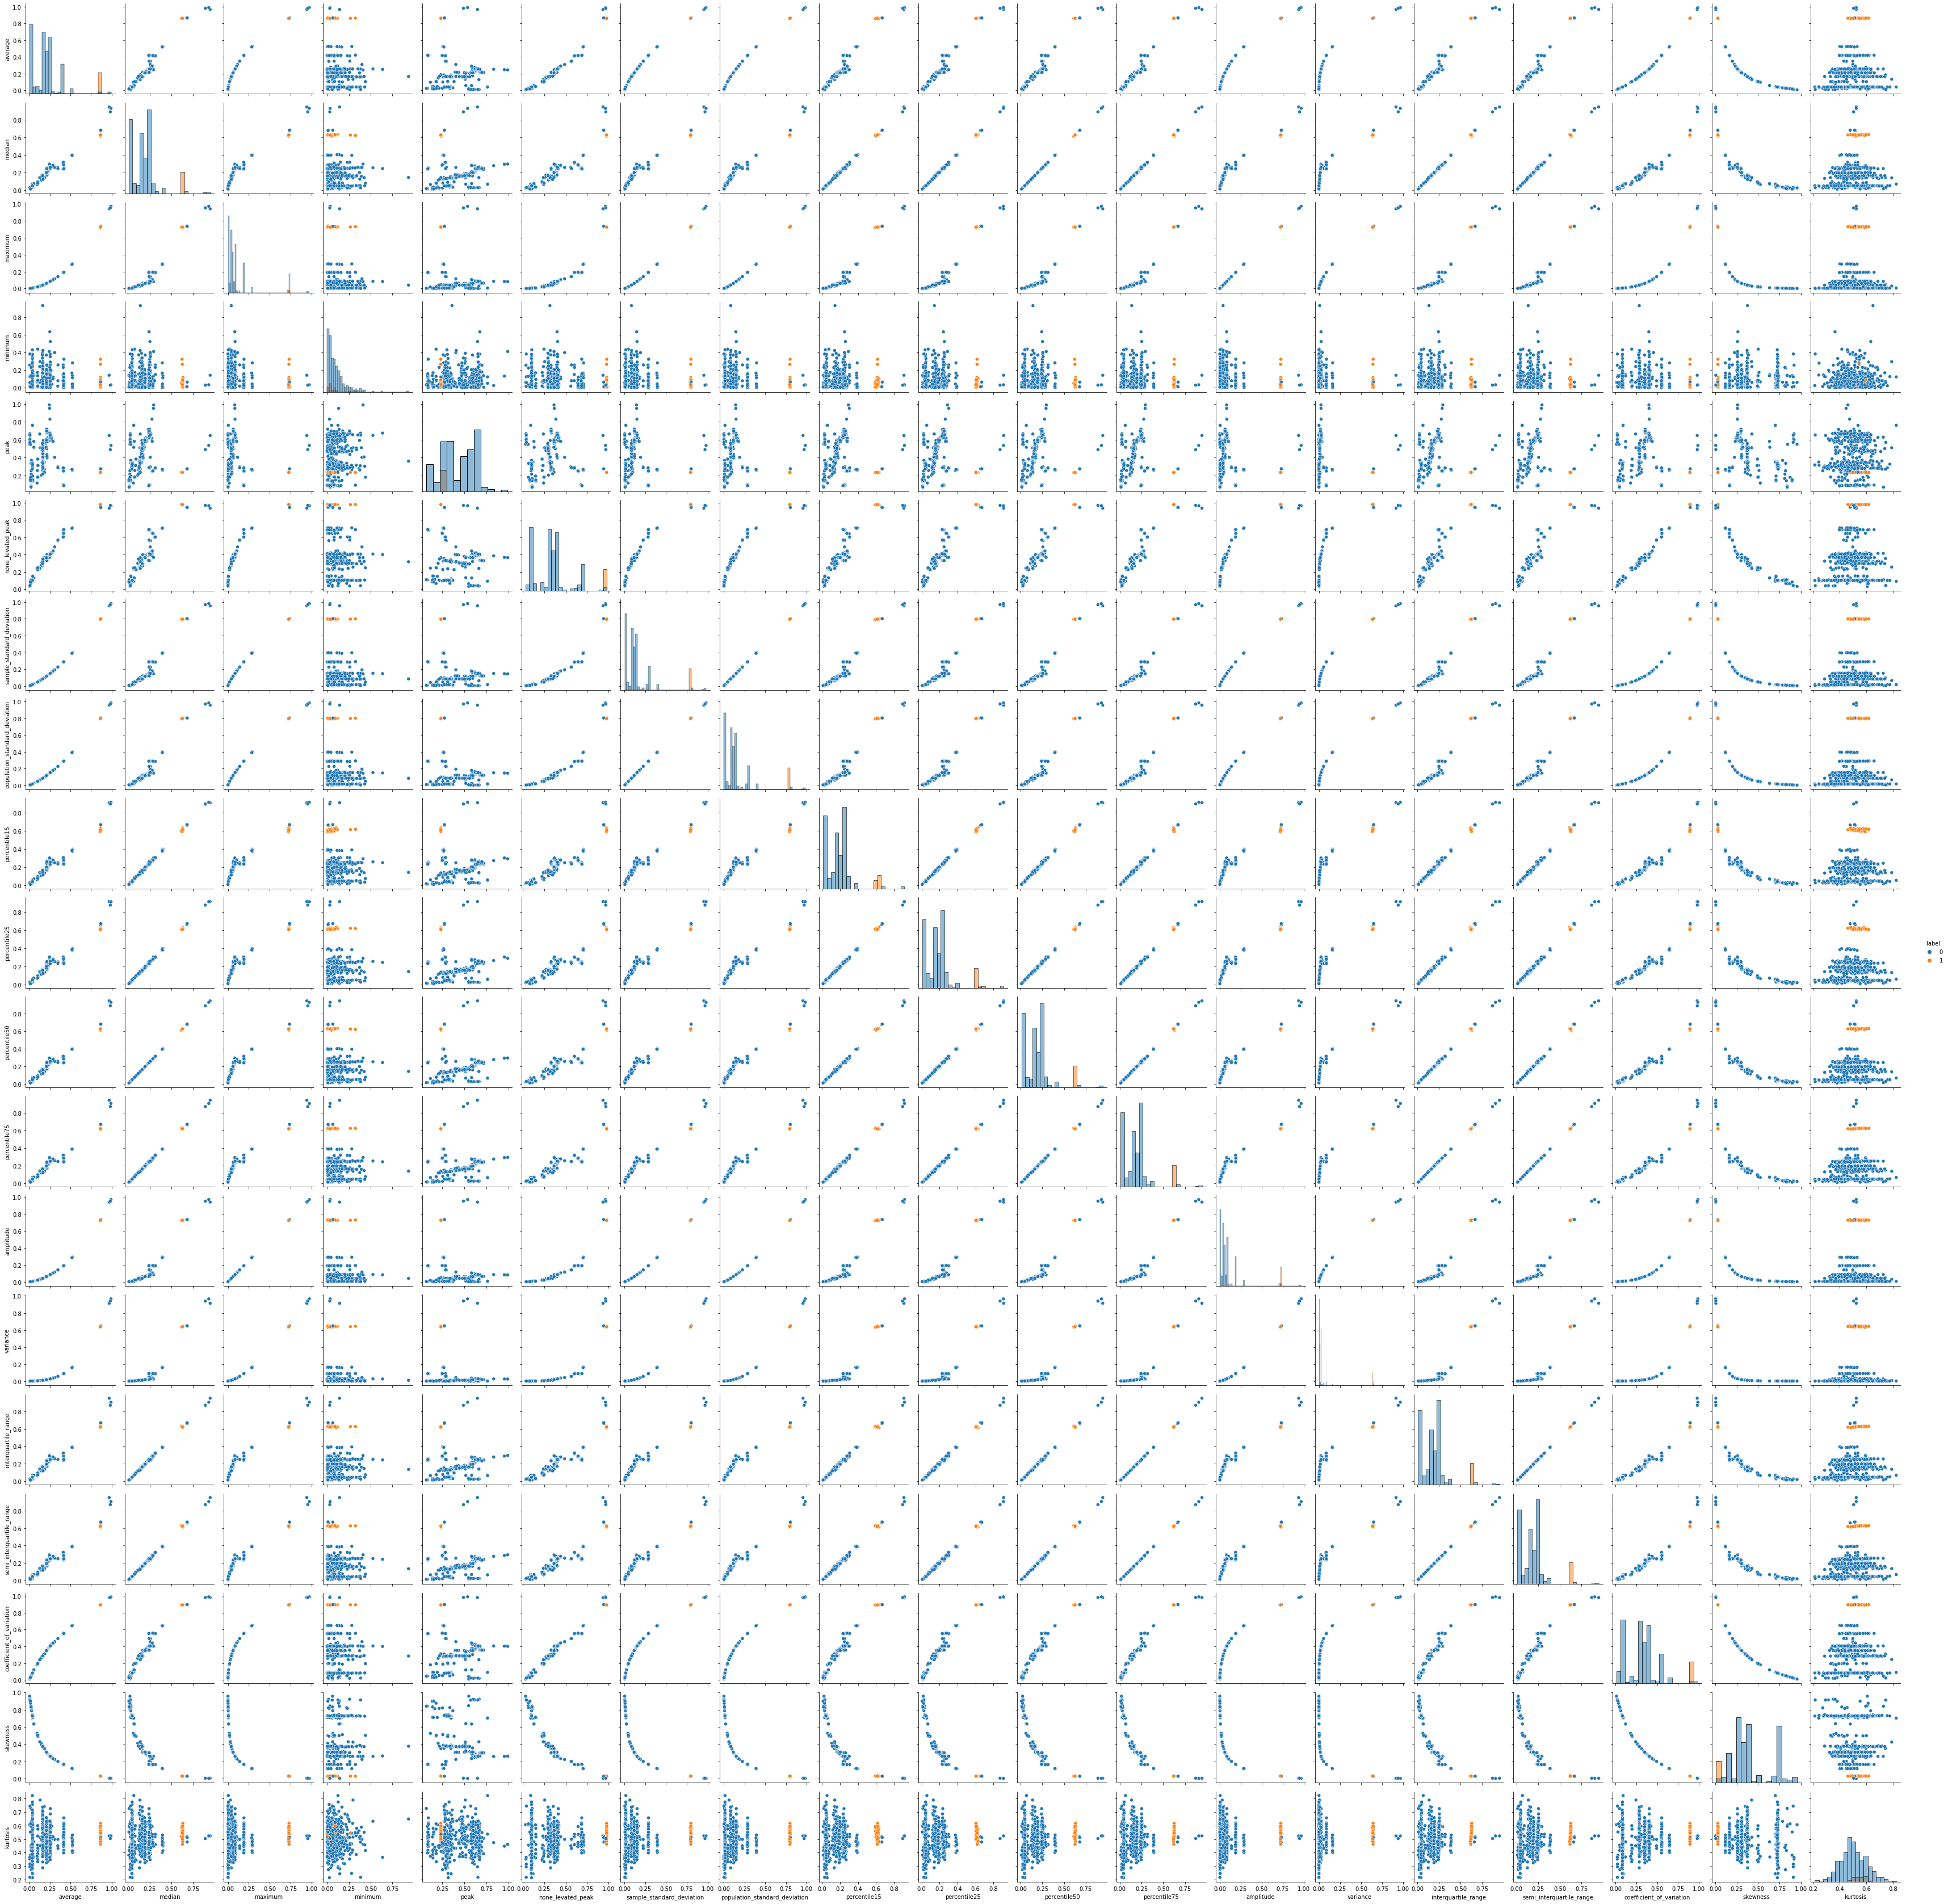

In [26]:
sns.pairplot(df.sample(500), hue='label',diag_kind="hist")

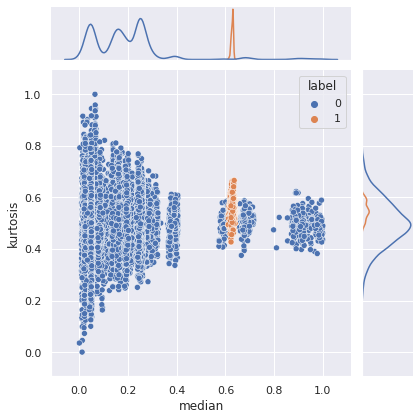

In [27]:
sns.set_theme(style="darkgrid")
g = sns.JointGrid(data=df, x="median", y="kurtosis", hue='label')

g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.kdeplot)

In [28]:
df.corr()

,average,median,maximum,minimum,peak,none_levated_peak,sample_standard_deviation,population_standard_deviation,percentile15,percentile25,percentile50,percentile75,amplitude,variance,interquartile_range,semi_interquartile_range,coefficient_of_variation,skewness,kurtosis,label
average,1.000000,0.973759,0.962251,-0.032972,-0.182882,0.974164,0.987707,0.987707,0.972757,0.972796,0.973759,0.973833,0.962251,0.913628,0.973886,0.973886,0.978228,-0.817691,0.108682,0.672179
median,0.973759,1.000000,0.946133,-0.013851,0.005272,0.926055,0.964801,0.964802,0.999032,0.999504,1.000000,0.999717,0.946133,0.909251,0.999550,0.999550,0.960046,-0.818582,0.104518,0.605268
maximum,0.962251,0.946133,1.000000,-0.024246,-0.227724,0.880596,0.992802,0.992802,0.944537,0.944655,0.946133,0.945608,1.000000,0.989129,0.945645,0.945645,0.888495,-0.647257,0.097441,0.726673
minimum,-0.032972,-0.013851,-0.024246,1.000000,0.089882,-0.044890,-0.028868,-0.028868,-0.012624,-0.013048,-0.013851,-0.013945,-0.024246,-0.017208,-0.014175,-0.014175,-0.032999,0.028536,0.001980,-0.012420
peak,-0.182882,0.005272,-0.227724,0.089882,1.000000,-0.203579,-0.217488,-0.217488,0.007801,0.008276,0.005272,0.006532,-0.227724,-0.222555,0.006076,0.006076,-0.088520,-0.089315,0.029749,-0.257306
none_levated_peak,0.974164,0.926055,0.880596,-0.044890,-0.203579,1.000000,0.929966,0.929968,0.925368,0.925266,0.926055,0.926686,0.880596,0.805263,0.926849,0.926849,0.990640,-0.897520,0.112233,0.603049
sample_standard_deviation,0.987707,0.964801,0.992802,-0.028868,-0.217488,0.929966,1.000000,1.000000,0.963455,0.963518,0.964801,0.964521,0.992802,0.964737,0.964568,0.964568,0.935027,-0.724379,0.102938,0.712436
population_standard_deviation,0.987707,0.964802,0.992802,-0.028868,-0.217488,0.929968,1.000000,1.000000,0.963456,0.963518,0.964802,0.964522,0.992802,0.964736,0.964568,0.964568,0.935029,-0.724381,0.102938,0.712435
percentile15,0.972757,0.999032,0.944537,-0.012624,0.007801,0.925368,0.963455,0.963456,1.000000,0.999441,0.999032,0.998854,0.944537,0.907390,0.998479,0.998479,0.959556,-0.818847,0.098909,0.604898
percentile25,0.972796,0.999504,0.944655,-0.013048,0.008276,0.925266,0.963518,0.963518,0.999441,1.000000,0.999504,0.999321,0.944655,0.907586,0.998922,0.998922,0.959631,-0.819039,0.096901,0.602707


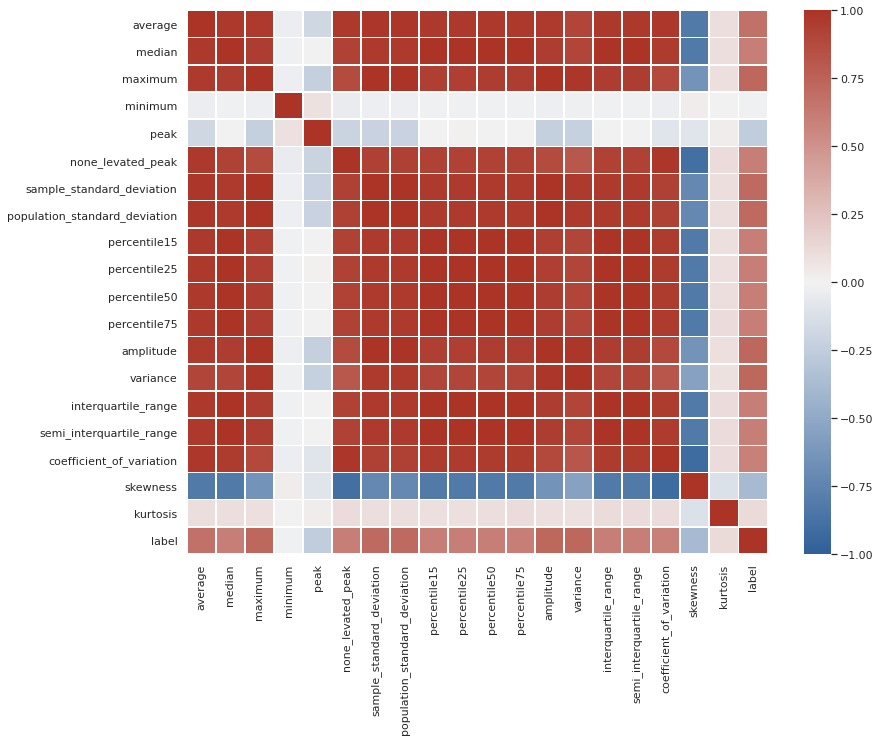

In [29]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, linewidths=.5, cmap=color_map)